In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold,cross_val_score
import warnings
warnings.simplefilter('ignore')

In [2]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('dataset/CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [4]:
df['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


In [6]:
num_feature = df.select_dtypes(exclude='object')
num_feature

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


In [7]:
num_feature = num_feature.loc[:, 'symboling':]

#### 外れ値の確認

<function matplotlib.pyplot.show(*args, **kw)>

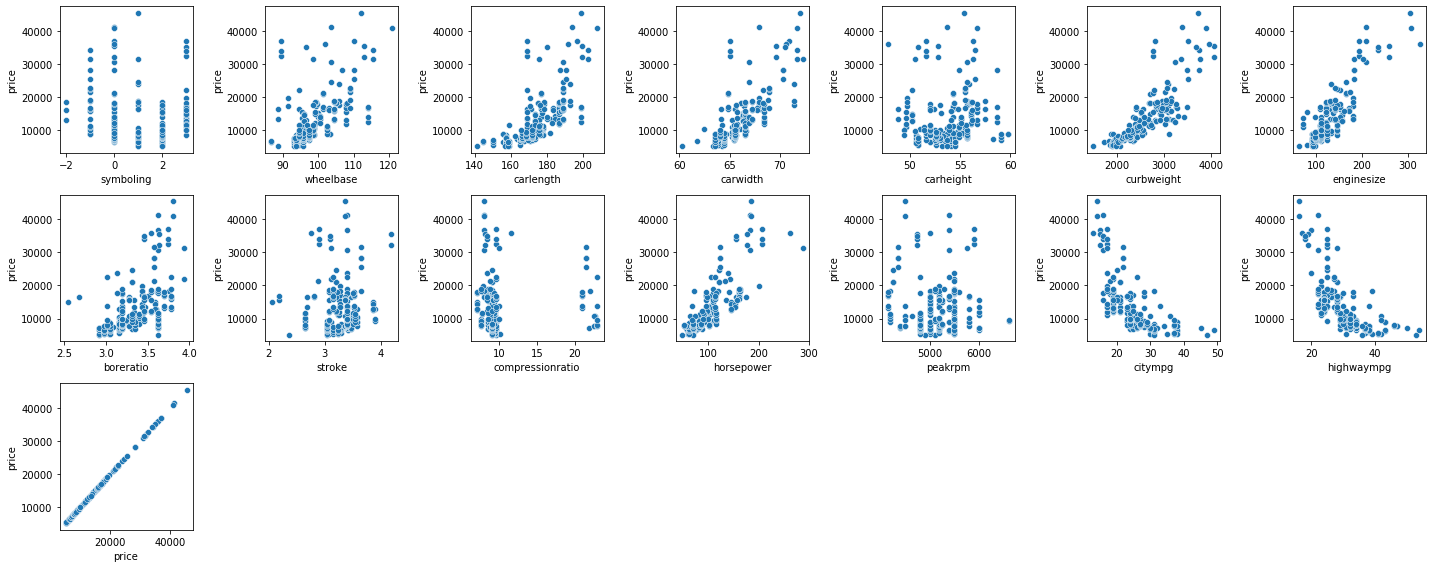

In [8]:
fig = plt.figure(figsize=(20,8))
for i in range(len(num_feature.columns)):
    fig.add_subplot(3, 7, i+1)
    sns.scatterplot(num_feature.iloc[:,i], num_feature['price'], data=num_feature)
    
plt.tight_layout()
plt.show

In [9]:
num_feature.columns

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

#### 価格帯の確認

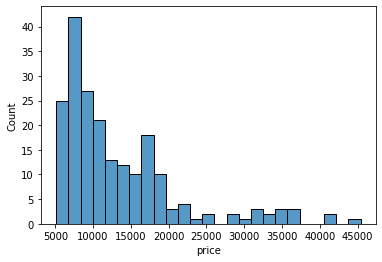

In [10]:
sns.histplot(df['price'], bins=25)

#### 外れ値を削除

In [11]:
df[df['price'] > 40000]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
16,17,0,bmw x5,gas,std,two,sedan,rwd,front,103.5,193.8,67.9,53.7,3380,ohc,six,209,mpfi,3.62,3.39,8.0,182,5400,16,22,41315.0
73,74,0,buick century special,gas,std,four,sedan,rwd,front,120.9,208.1,71.7,56.7,3900,ohcv,eight,308,mpfi,3.80,3.35,8.0,184,4500,14,16,40960.0
74,75,1,buick regal sport coupe (turbo),gas,std,two,hardtop,rwd,front,112.0,199.2,72.0,55.4,3715,ohcv,eight,304,mpfi,3.80,3.35,8.0,184,4500,14,16,45400.0


In [12]:
df = df.drop(index=[16, 73, 74])

<function matplotlib.pyplot.show(*args, **kw)>

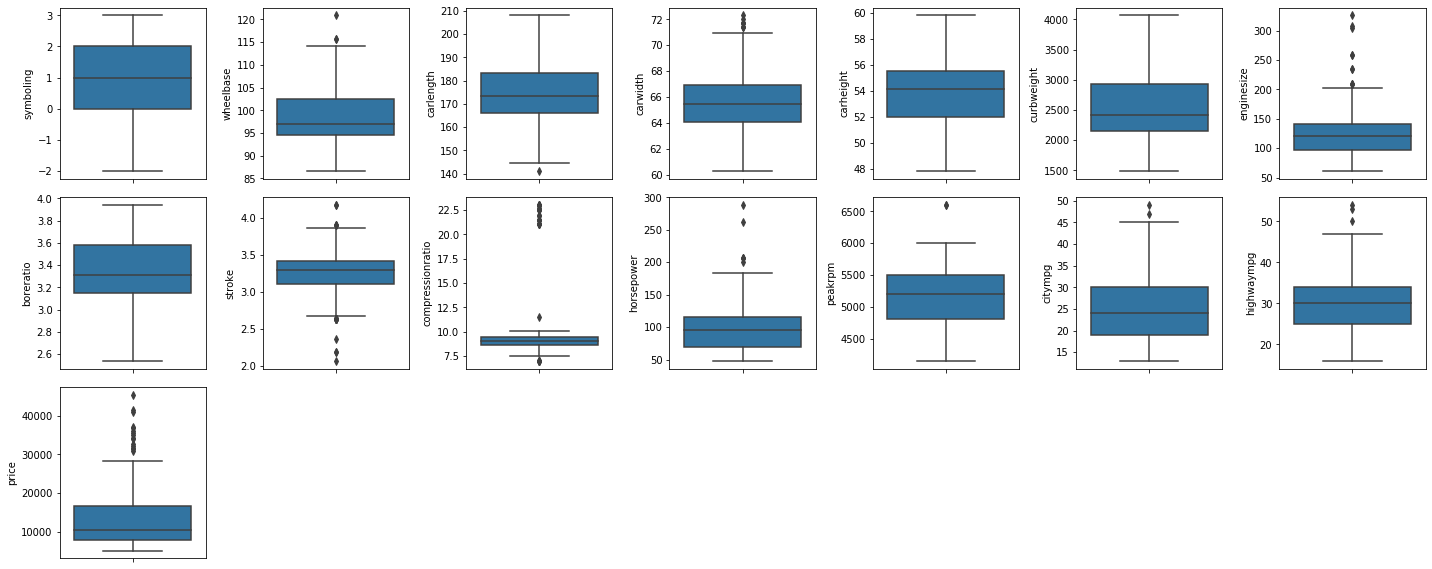

In [13]:
fig = plt.figure(figsize=(20,8))
for i in range(len(num_feature.columns)):
    fig.add_subplot(3, 7, i+1)
    sns.boxplot(y=num_feature.iloc[:,i])
    
plt.tight_layout()
plt.show

In [14]:
df[df['wheelbase'] > 115]
df = df.drop(index=[70, 71])

In [15]:
df[df['horsepower'] > 250]
df = df.drop(index=[49, 129])

In [16]:
df[df['enginesize'] > 250 ]
df = df.drop(index=[47, 48])

In [17]:
num_feature = df.select_dtypes(exclude='object')

<function matplotlib.pyplot.show(*args, **kw)>

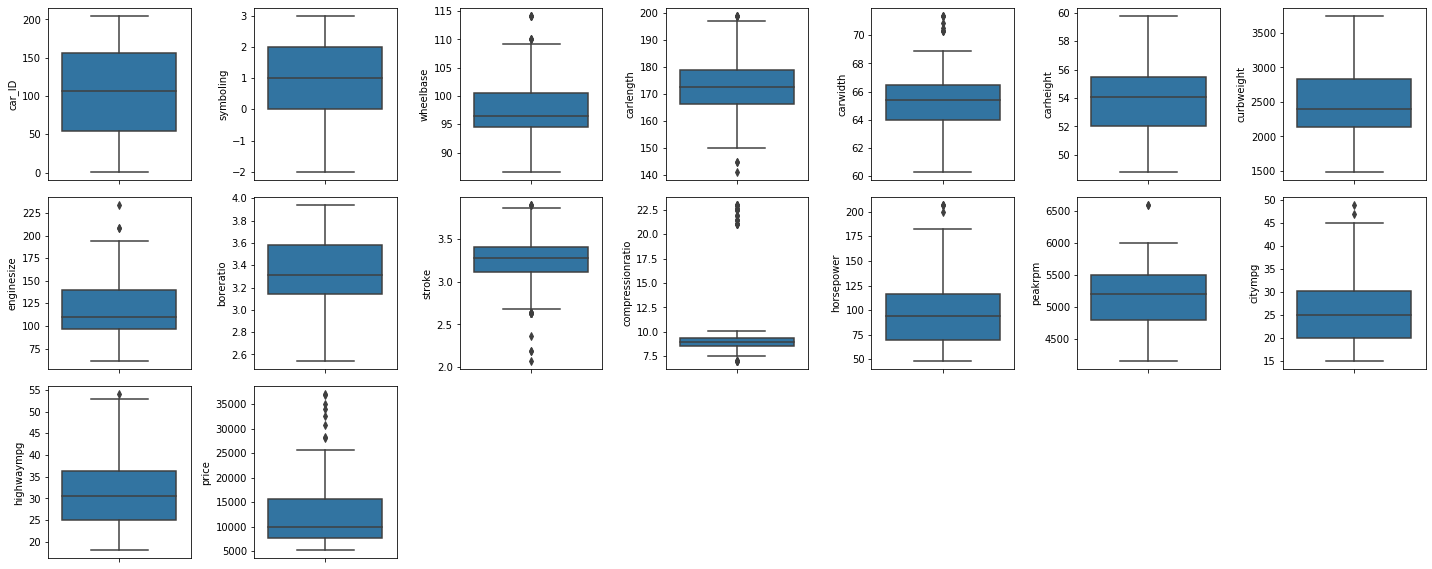

In [18]:
fig = plt.figure(figsize=(20,8))
for i in range(len(num_feature.columns)):
    fig.add_subplot(3, 7, i+1)
    sns.boxplot(y=num_feature.iloc[:,i])
    
plt.tight_layout()
plt.show

#### 料金との相関を確認

In [19]:
num_feature_corr = num_feature.corr()

In [20]:
price_corr = pd.DataFrame({'feature': num_feature_corr.index, 'price_corr': num_feature_corr['price']}, index=None)
price_corr = price_corr.reset_index(drop=True)

In [21]:
price_corr[price_corr['price_corr'].abs() > 0.5 ].sort_values(by='price_corr', ascending=True)

,feature,price_corr
13,citympg,-0.666651
14,highwaympg,-0.665386
8,boreratio,0.519207
3,carlength,0.613518
4,carwidth,0.686278
6,curbweight,0.789730
11,horsepower,0.790453
7,enginesize,0.813857
15,price,1.000000


In [22]:
df = df.drop(['car_ID', 'symboling', 'CarName'], axis=1)

In [23]:
feture_df = df.select_dtypes(include='object')
feture_df

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...
200,gas,std,four,sedan,rwd,front,ohc,four,mpfi
201,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
202,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
203,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


In [24]:
from sklearn.preprocessing import StandardScaler,LabelEncoder

#### ラベルエンコーディングとスケーリング

In [25]:
lbl = LabelEncoder()
for col in feture_df.columns:
    df[col] = lbl.fit_transform(df[col])

In [26]:
num_feature = df.loc[:,'wheelbase':'price']
num_feature

scaler =StandardScaler()

for col in num_feature.columns:
    df[col] = scaler.fit_transform(df[col].values.reshape(-1,1))

In [27]:
df

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,0,1,0,2,0,-1.788743,-0.368580,-0.839762,-2.039919,0.105872,-2.461335,-0.193209,0.292655,0.898257,0.588656,-1.874726,-0.288777,0.322590,-0.289344,-0.735882,-0.646641,0.204584
1,1,0,1,0,2,0,-1.788743,-0.368580,-0.839762,-2.039919,0.105872,-2.461335,-0.193209,0.292655,0.898257,0.588656,-1.874726,-0.288777,0.322590,-0.289344,-0.735882,-0.646641,0.682830
2,1,0,1,2,2,0,-0.691685,-0.157758,-0.097395,-0.550354,0.708461,2.303324,1.453268,1.014997,0.898257,-2.397829,0.739490,-0.288777,1.591867,-0.289344,-1.052182,-0.798975,0.682830
3,1,0,0,3,1,0,0.293807,0.316592,0.273788,0.235806,-0.356477,-0.079006,-0.193209,-0.396852,0.898257,-0.469845,0.507851,-0.035781,0.056928,0.764771,-0.261432,-0.189640,0.276997
4,1,0,0,3,0,0,0.219430,0.316592,0.379841,0.235806,0.710652,-0.079006,-1.839687,0.489658,0.898257,-0.469845,0.507851,-0.541773,0.440663,0.764771,-1.210333,-1.408310,0.834023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1,0,0,3,2,0,2.023067,1.388270,1.705496,0.732327,0.991129,-0.079006,-0.193209,0.653826,0.898257,1.760568,-0.319433,-0.162279,0.411145,0.553948,-0.419582,-0.494308,0.737737
201,1,1,0,3,2,0,2.023067,1.388270,1.652470,0.732327,1.203679,-0.079006,-0.193209,0.653826,0.898257,1.760568,-0.319433,-0.364676,1.768976,0.343125,-1.052182,-0.951309,1.087867
202,1,0,0,3,2,0,2.023067,1.388270,1.705496,0.732327,1.122603,2.303324,1.453268,1.704504,0.898257,1.004496,-1.245990,-0.339376,1.001506,0.764771,-1.210333,-1.255976,1.476194
203,0,1,0,3,2,0,2.023067,1.388270,1.705496,0.732327,1.571806,-0.079006,1.453268,0.785161,-0.090835,-1.150310,0.507851,3.253168,0.175000,-0.710990,0.054868,-0.646641,1.632957


In [28]:
X = df.drop(['price'], axis=1)
y = df['price']
y = np.array(y)

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=0)

In [30]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge

In [31]:
lin_reg = LinearRegression()
lasso = Lasso()
ridge = Ridge()
K_Fold = KFold(n_splits=5, shuffle=True,random_state=0)

In [32]:
lin_reg.fit(X_train,y_train)
print('LinearRegression : {}'.format(lin_reg.score(X_test,y_test)))

LinearRegression : 0.8023202054342404


In [33]:
lasso.fit(X_train,y_train)
print('lasso : {}'.format(lasso.score(X_test,y_test)))

lasso : -0.0003315880504060065


In [34]:
ridge.fit(X_train,y_train)
print('ridge : {}'.format(ridge.score(X_test,y_test)))

ridge : 0.8092502221744177


In [35]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor()
random_forest.fit(X_train,y_train)
print('random_forest :{}'.format(random_forest.score(X_test,y_test)))

random_forest :0.9017933141102026


In [36]:
feature_importance = random_forest.feature_importances_

In [37]:
feature_importance = pd.DataFrame({'feature': np.array(feature_importance)}, index=X_train.columns)

In [38]:
feature_importance.sort_values(by='feature', ascending=False)

,feature
curbweight,0.437474
enginesize,0.380888
highwaympg,0.060079
carwidth,0.023973
horsepower,0.023231
carlength,0.010706
peakrpm,0.010621
stroke,0.009310
fuelsystem,0.007280
wheelbase,0.006782
